### 基于PCA的人脸识别
在这个案例中，我们将使用PCA做人脸识别，主要分为两步：
1. 利用PCA把64*64大小的图片映射到低维空间
2. 在低维空间利用随机森林做分类

#### 通过这个案例会学到：
- 如何展示图片
- 如果在图片上应用PCA
- 如何可视化特征值的ratio
- 如何选择合适的主成分个数
- 如何可视化eigenface
- 如何把数据降维
- 如果在降维的数据上训练分类模型

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# 直接从sklearn导入人脸识别数据
from sklearn.datasets import fetch_olivetti_faces  
data = fetch_olivetti_faces()
data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [52]:
inputs=data.data
target=data.target
images=data.images
inputs.shape  # 400张人脸图片，每个图片像素为64*64

(400, 4096)

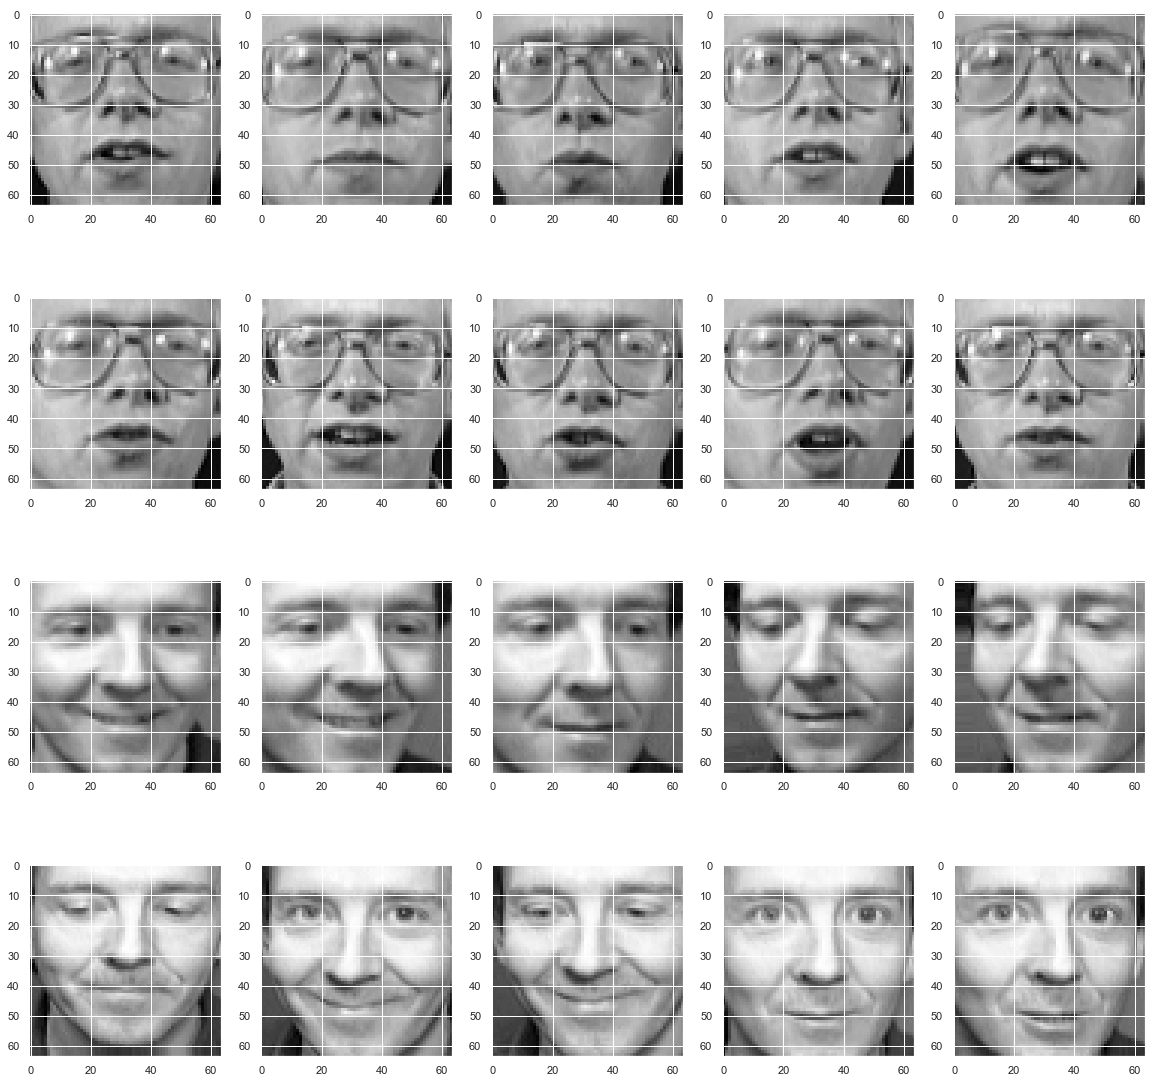

In [53]:
# 显示其中几张图片
plt.figure(figsize=(20,20)) # 设置fig大小
for i in range(10,30):  # 输出其中20张图片
    plt.subplot(4,5,i-9)  # 每行五张图片，总共四行
    plt.imshow(data.images[i], cmap=plt.cm.gray) 
plt.show()

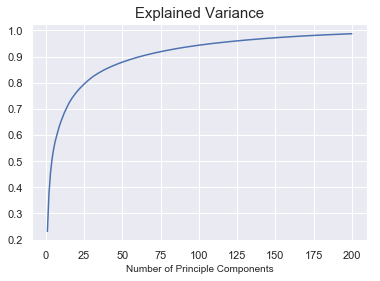

In [54]:
# 导入相应的库
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, random_state=365)

# 利用PCA把原来4096（64*64）维度的数据映射到100维上
pca = PCA(n_components=200, whiten=True)
# 在训练数据上学习主成分，并把训练数据转换成100维的数据
X_train = pca.fit_transform(X_train)
# 在测试数据上做同样的转换
X_test = pca.transform(X_test)

# 可视化前100个主成分（占比）
plt.plot(range(1,201), pca.explained_variance_ratio_.cumsum())
plt.title('Explained Variance',fontsize=15)
plt.xlabel('Number of Principle Components', fontsize=10)
plt.show()

# 从结果图中可以看出，当拥有100个主成分时已经将近接近了95%，所以我们可以选定利用前100个主成分

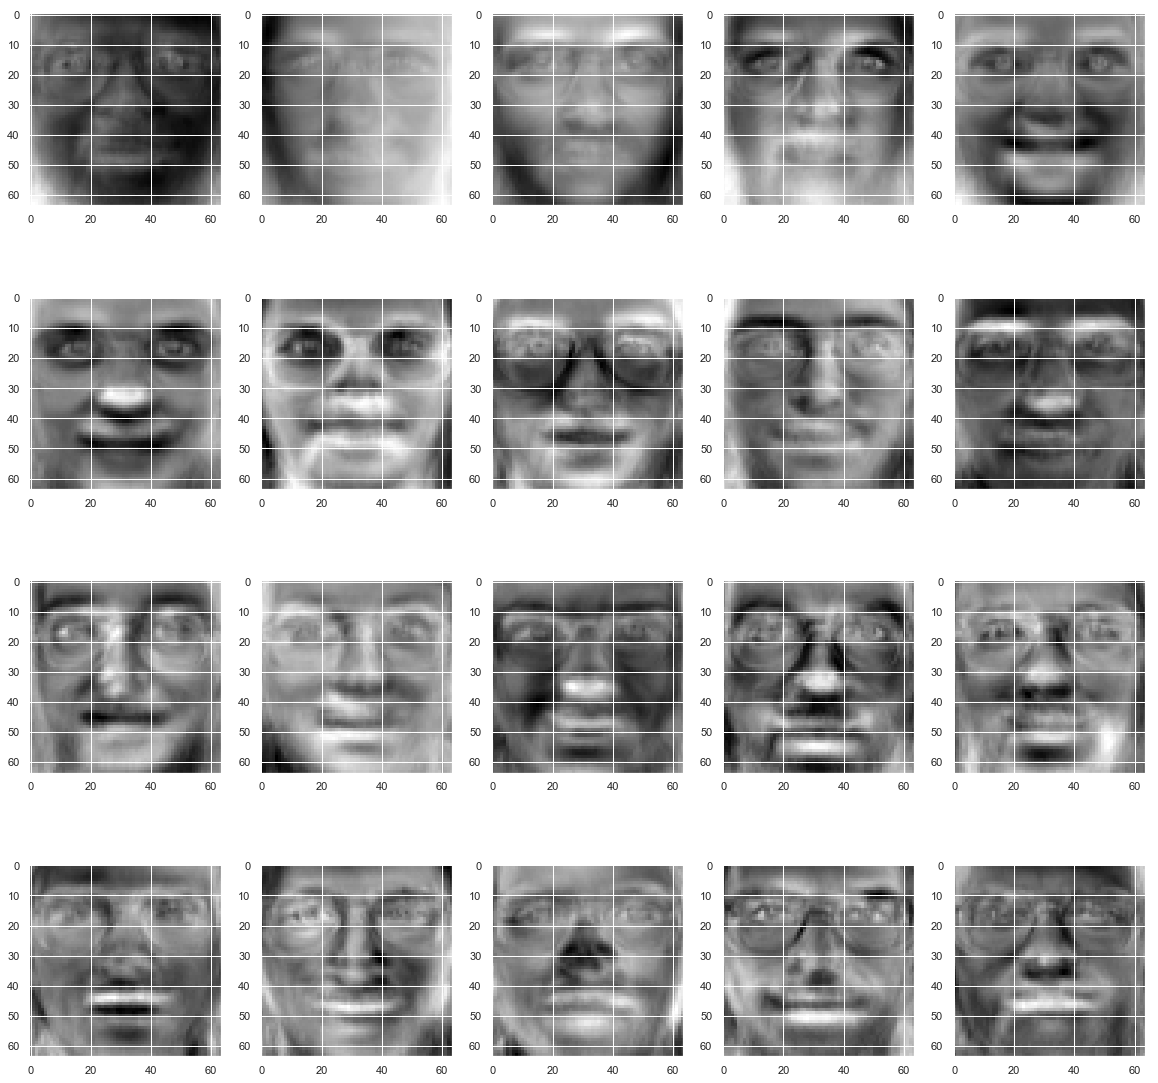

In [55]:
# 在这里，我们可视化主成分。对于人脸识别，我们把每一个主成分也称之为
# eigenface
plt.figure(figsize=(20,20)) # 设置fig大小
for i in range(0,20):  # 输出前20个主成分
    plt.subplot(4,5,i+1)  # 每行五张图片，总共四行
    # 可视化每一个主成分，可视化时需要reshape成64*64的矩阵形式，这样才能输出为图片
    plt.imshow(pca.components_[i].reshape(64,-1),cmap=plt.cm.gray) 
plt.show()

In [56]:
# 利用随机森林图像的分类
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, random_state=0)
clf.fit(X_train, y_train)

# 计算一下分类准确率
accuracy_train= clf.score(X_train, y_train)
accuracy_test= clf.score(X_test, y_test)
print('Accuracy - train data: {}'.format(accuracy_train))
print('Accuracy - test data : {}'.format( accuracy_test))

# 计算一下f1-score
from sklearn.metrics import f1_score
test_pre=clf.predict(X_test)
train_pre=clf.predict(X_train)
f1_train=f1_score(y_train,train_pre,average='weighted')
f1_test=f1_score(y_test,test_pre,average='weighted')
print("f1 score - train data  : {}" .format(f1_train))
print("f1 score - test data  : {}" .format(f1_test))

Accuracy - train data: 1.0
Accuracy - test data : 0.96
f1 score - train data  : 1.0
f1 score - test data  : 0.9601587301587301
